<a href="https://colab.research.google.com/github/annacfisher/project_gss/blob/main/group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1

## Machine Learning 1

### Summary:

### Results:

### Conclusion:

### Loading GSS dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/annacfisher/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 59 (delta 22), reused 8 (delta 8), pack-reused 33
Receiving objects: 100% (59/59), 24.31 MiB | 11.19 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
df = pd.read_csv('/content/project_gss/selected_gss_data.csv')

In [4]:
df.head()

,marital,postlife,age,happy,income
0,never married,NaN,23.0,not too happy,NaN
1,married,NaN,70.0,not too happy,NaN
2,married,NaN,48.0,pretty happy,NaN
3,married,NaN,27.0,not too happy,NaN
4,married,NaN,61.0,pretty happy,NaN


In [5]:
df.value_counts()

marital  postlife  age   happy          income            
married  yes       43.0  pretty happy   $25,000 or more       186
                   36.0  pretty happy   $25,000 or more       176
                   35.0  pretty happy   $25,000 or more       175
                   37.0  pretty happy   $25,000 or more       172
                   40.0  pretty happy   $25,000 or more       161
                                                             ... 
                   68.0  not too happy  $15,000 to $19,999      1
                   67.0  very happy     $7,000 to $7,999        1
                                        $5,000 to $5,999        1
                         pretty happy   $3,000 to $3,999        1
widowed  yes       89.0  very happy     under $1,000            1
Length: 8716, dtype: int64

### Cleaning 'marital', 'postlife', 'age', 'happy', and 'income' variables
Ashley - marital status

Anna - age, happy

Semin - after life

Emily - income

In [6]:
#cleaning age and happiness level

In [7]:
print(df.dtypes, '\n')

marital     object
postlife    object
age         object
happy       object
income      object
dtype: object 



In [8]:
df['age'].describe()

count     71623
unique       73
top        30.0
freq       1571
Name: age, dtype: object

In [9]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].describe() #after - only losing 2 data points


count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

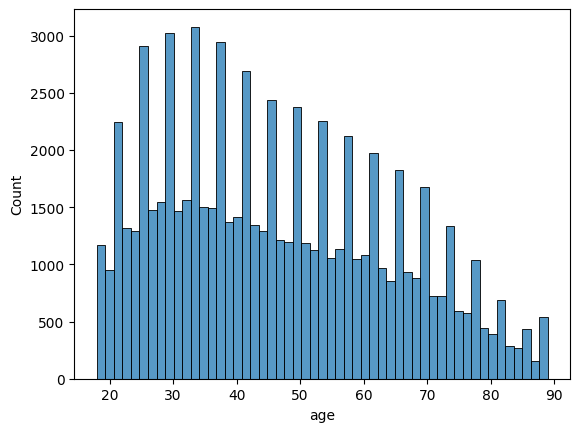

In [10]:
sns.histplot(df['age'])

In [11]:
df['happy'].value_counts()

#df['happy'].describe() #not all age observations have a happiness observation

pretty happy     37813
very happy       20385
not too happy     9390
happy                2
Name: happy, dtype: int64

In [12]:
#only 2 people answered happy, and it's unclear where happy is in the rankings, so replace those values with NAN

In [13]:
df['happy'] = df['happy'].replace( 'happy', np.nan)

<Axes: >

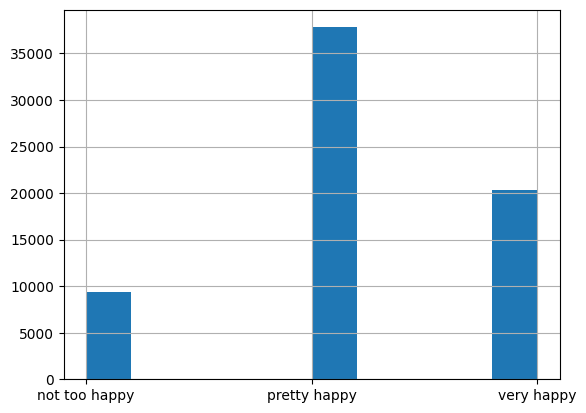

In [14]:
df["happy"].hist()


In [15]:
# cleaning postlife variable

In [16]:
var = 'postlife'
print(df [var].unique(), '\n') # A Categorical Example

[nan 'yes' 'no' 'postlife'] 



In [17]:
df[var] = df[var].replace(' ',np.nan) # replace blank to np.nan
print (df[var].value_counts(), '\n')

yes         35337
no           8811
postlife        2
Name: postlife, dtype: int64 



<Axes: >

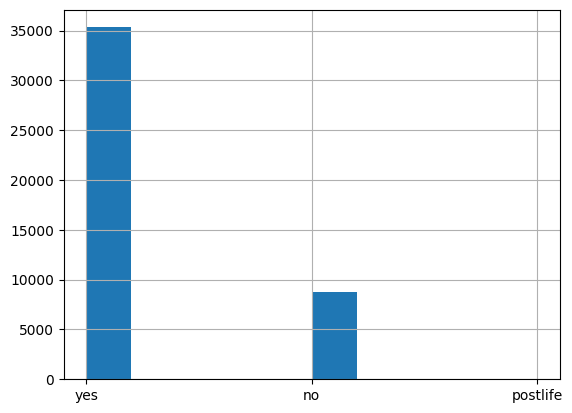

In [18]:
df['postlife'].hist()

In [19]:
# cleaning marital status variable

In [20]:
var = 'marital'
print(df [var].unique(), '\n') # showing unique values for marital variable
print (df[var].value_counts(), '\n') # showing counts for each unique value in marital variable

['never married' 'married' 'divorced' 'widowed' 'separated' nan 'marital'] 

married          37590
never married    15910
divorced          9642
widowed           6756
separated         2441
marital              2
Name: marital, dtype: int64 



In [21]:
df[var] = df[var].replace('marital',np.nan) # replace marital to np.nan because there are only two in that variable
print (df[var].value_counts(), '\n') # showing counts for each unique value in marital variable to check that I made the marital value nan

married          37590
never married    15910
divorced          9642
widowed           6756
separated         2441
Name: marital, dtype: int64 



<Axes: >

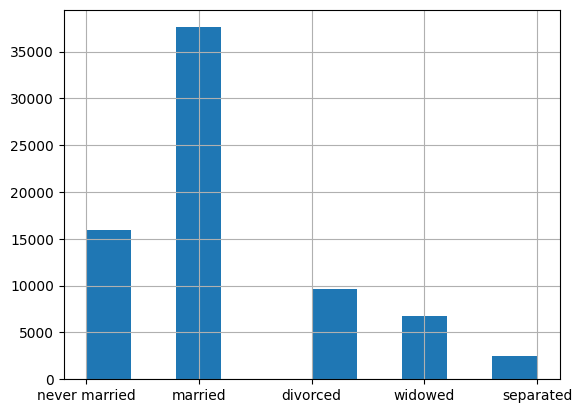

In [22]:
df['marital'].hist() # making a histogram for marital status variable

In [23]:
# cleaning income
income = df['income']
income.unique()
# because they're all strings, i think it would be easier if I just chose the upper bound and rounded (say $4,000 to $4,999 and rounded to 5000)
# also want to get rid of the nan and the commas and dollar signs

array([nan, '$10,000 to $14,999', '$7,000 to $7,999', '$4,000 to $4,999',
       '$1,000 to $2,999', '$15,000 to $19,999', '$5,000 to $5,999',
       '$20,000 to $24,999', '$3,000 to $3,999', 'under $1,000',
       '$8,000 to $9,999', '$25,000 or more', '$6,000 to $6,999',
       'income'], dtype=object)

In [24]:
income = income.str.replace(',','')
print(income) # no commas

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
72387    $25000 or more
72388    $25000 or more
72389    $25000 or more
72390    $25000 or more
72391    $25000 or more
Name: income, Length: 72392, dtype: object


In [25]:
income = income.str.replace('$','')
print(income) # no dollar signs

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
72387    25000 or more
72388    25000 or more
72389    25000 or more
72390    25000 or more
72391    25000 or more
Name: income, Length: 72392, dtype: object


<ipython-input-25-1a18825ccf92>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income = income.str.replace('$','')


In [26]:
print(income.unique()) # why is 'income' a value for income?

[nan '10000 to 14999' '7000 to 7999' '4000 to 4999' '1000 to 2999'
 '15000 to 19999' '5000 to 5999' '20000 to 24999' '3000 to 3999'
 'under 1000' '8000 to 9999' '25000 or more' '6000 to 6999' 'income']


In [27]:
income = income.replace('income', np.nan) # got rid of income and nan
income = income.replace('nan', np.nan)
print(df.value_counts(income))

income
25000 or more     34785
10000 to 14999     6850
20000 to 24999     5528
15000 to 19999     5301
8000 to 9999       2285
1000 to 2999       1412
7000 to 7999       1315
5000 to 5999       1314
3000 to 3999       1309
6000 to 6999       1249
4000 to 4999       1189
under 1000          902
dtype: int64


In [28]:
# going to round up all of them except under 1000, which i will make 999 - also making them int not str
# there's probably a function that would make this way easier, but idk how to do that
income = income.replace('25000 or more', 26000)
income = income.replace('10000 to 14999', 15000)
income = income.replace('20000 to 24999', 25000)
income = income.replace('15000 to 19999', 20000)
income = income.replace('8000 to 9999', 10000)
income = income.replace('1000 to 2999', 3000)
income = income.replace('7000 to 7999', 8000)
income = income.replace('5000 to 5999', 6000)
income = income.replace('3000 to 3999', 4000)
income = income.replace('6000 to 6999', 7000)
income = income.replace('4000 to 4999', 5000)
income = income.replace('under 1000', 999)

In [29]:
print(df.value_counts(income))
print(income.dtype) # it's numeric now

income
26000.0    34785
15000.0     6850
25000.0     5528
20000.0     5301
10000.0     2285
3000.0      1412
8000.0      1315
6000.0      1314
4000.0      1309
7000.0      1249
5000.0      1189
999.0        902
dtype: int64
float64


In [30]:
df['income'] = income
del income # gets rid of my temporary variable
df['income'].value_counts() # returns the final count

26000.0    34785
15000.0     6850
25000.0     5528
20000.0     5301
10000.0     2285
3000.0      1412
8000.0      1315
6000.0      1314
4000.0      1309
7000.0      1249
5000.0      1189
999.0        902
Name: income, dtype: int64

In [31]:
df['income'].shape # okay good

(72392,)

<Axes: >

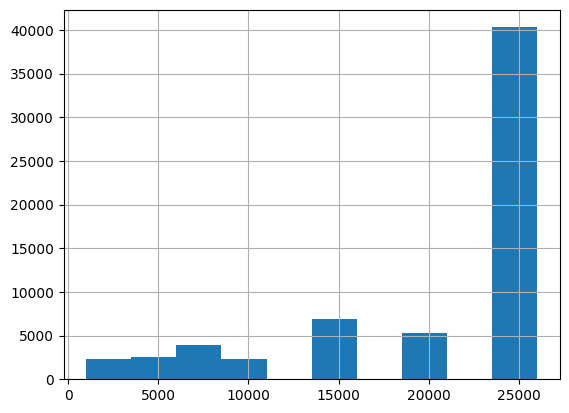

In [32]:
df['income'].hist()